In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_directory = "/Users/kkubiak/Library/Mobile Documents/com~apple~CloudDocs/CSIT/DSSE/Lab3/Names"

In [3]:
all_data = pd.DataFrame()

In [ ]:
for filename in os.listdir(data_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(data_directory, filename)
        year = int(filename[3:7])
        if(year > 2018):
            continue
        data = pd.read_csv(file_path, names=['Name', 'Gender', 'Count'])
        data['Year'] = year
        all_data = all_data.append(data)

all_data.reset_index(drop=True, inplace=True)

all_data = all_data.sort_values('Year')

In [5]:
start_year = 2009
end_year = 2018

last_decade_data = all_data[(all_data['Year'] >= start_year) & (all_data['Year'] <= end_year)]

In [ ]:

filtered_data = all_data[(all_data['Year'] >= 2009) & (all_data['Year'] <= 2018)]

most_popular_boys_names = []
most_popular_girls_names = []

for year in range(2009, 2019):
    year_data = filtered_data[filtered_data['Year'] == year]
    
    name_counts = year_data.groupby(['Name', 'Gender'])['Count'].sum().reset_index()
    
    sorted_names = name_counts.sort_values(by='Count', ascending=False)
    
    top_boys_names = sorted_names[sorted_names['Gender'] == 'M'].head(20)['Name'].tolist()
    top_girls_names = sorted_names[sorted_names['Gender'] == 'F'].head(20)['Name'].tolist()

    most_popular_boys_names.extend(top_boys_names)
    most_popular_girls_names.extend(top_girls_names)

popular_names_df = pd.DataFrame({'Year': [], 'Boys Names': [], 'Girls Names': []})

for year in range(2009, 2019):
    boys_names = most_popular_boys_names[(year - 2009) * 20: (year - 2009 + 1) * 20]
    girls_names = most_popular_girls_names[(year - 2009) * 20: (year - 2009 + 1) * 20]
    year_df = pd.DataFrame({'Year': [year] * 20, 'Boys Names': boys_names, 'Girls Names': girls_names})
    popular_names_df = popular_names_df.append(year_df, ignore_index=True)

print(popular_names_df)

In [8]:
from prettytable import PrettyTable

table = PrettyTable()


for year in range(2009, 2019):
    year_data = popular_names_df[popular_names_df['Year'] == year]
    
    boys_names = year_data['Boys Names'].tolist()
    
    sorted_names = sorted(boys_names, key=lambda x: boys_names.index(x))
    
    table.add_column(str(year), sorted_names)



print(table, '')

+-------------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|     2009    |     2010    |     2011    |    2012   |    2013   |    2014   |    2015   |    2016   |    2017   |    2018   |
+-------------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|    Jacob    |    Jacob    |    Jacob    |   Jacob   |    Noah   |    Noah   |    Noah   |    Noah   |    Liam   |    Liam   |
|    Ethan    |    Ethan    |    Mason    |   Mason   |   Jacob   |    Liam   |    Liam   |    Liam   |    Noah   |    Noah   |
|   Michael   |   Michael   |   William   |   Ethan   |    Liam   |   Mason   |   Mason   |  William  |  William  |  William  |
|  Alexander  |    Jayden   |    Jayden   |    Noah   |   Mason   |   Jacob   |   Jacob   |   Mason   |   James   |   James   |
|   William   |   William   |     Noah    |  William  |  William  |  William  |  William  |   James   | 

In [9]:
from prettytable import PrettyTable

table = PrettyTable()


for year in range(2009, 2019):
    year_data = popular_names_df[popular_names_df['Year'] == year]
    
    boys_names = year_data['Girls Names'].tolist()
    
    sorted_names = sorted(boys_names, key=lambda x: boys_names.index(x))
    
    table.add_column(str(year), sorted_names)



print(table, '')

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|    2009   |    2010   |    2011   |    2012   |    2013   |    2014   |    2015   |    2016   |    2017   |    2018   |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|  Isabella |  Isabella |   Sophia  |   Sophia  |   Sophia  |    Emma   |    Emma   |    Emma   |    Emma   |    Emma   |
|    Emma   |   Sophia  |  Isabella |    Emma   |    Emma   |   Olivia  |   Olivia  |   Olivia  |   Olivia  |   Olivia  |
|   Olivia  |    Emma   |    Emma   |  Isabella |   Olivia  |   Sophia  |   Sophia  |    Ava    |    Ava    |    Ava    |
|   Sophia  |   Olivia  |   Olivia  |   Olivia  |  Isabella |  Isabella |    Ava    |   Sophia  |  Isabella |  Isabella |
|    Ava    |    Ava    |    Ava    |    Ava    |    Ava    |    Ava    |  Isabella |  Isabella |   Sophia  |   Sophia  |
|   Emily   |   Emily   

In [10]:

filtered_data = all_data[(all_data['Year'] >= 1990) & (all_data['Year'] <= 2000)]

girls_count = filtered_data[filtered_data['Gender'] == 'F']['Count'].sum()
boys_count = filtered_data[filtered_data['Gender'] == 'M']['Count'].sum()

print("Number of girls born between 1990 and 2000:", girls_count)
print("Number of boys born between 1990 and 2000:", boys_count)

Number of girls born between 1990 and 2000: 19816748
Number of boys born between 1990 and 2000: 21437454


In [11]:
all_data

,Name,Gender,Count,Year
1841825,Abbott,M,5,1880
1840482,Lenore,F,12,1880
1840483,Liddie,F,12,1880
1840484,Lotta,F,12,1880
1840485,Mame,F,12,1880
...,...,...,...,...
1883974,Noir,F,5,2018
1883973,Noellie,F,5,2018
1883972,Noam,F,5,2018
1883980,Novae,F,5,2018


In [ ]:
birth_counts = pd.DataFrame()

for year in all_data['Year'].unique():
    # print(year)
    subdata = all_data[(all_data['Year'] == year)]
    girls_count = subdata[subdata['Gender'] == 'F']['Count'].sum()
    boys_count = subdata[subdata['Gender'] == 'M']['Count'].sum()
    row = pd.DataFrame({'Year': [year], 'Girls Born': [girls_count], 'Boys Born': [boys_count]})
    
    birth_counts = birth_counts.append(row, ignore_index=True)

print(birth_counts)

In [31]:
birth_counts['Delta'] = birth_counts['Boys Born']-birth_counts['Girls Born']
birth_counts['Boys Percentage'] =  birth_counts['Boys Born']/(birth_counts['Boys Born']+birth_counts['Girls Born'])*100

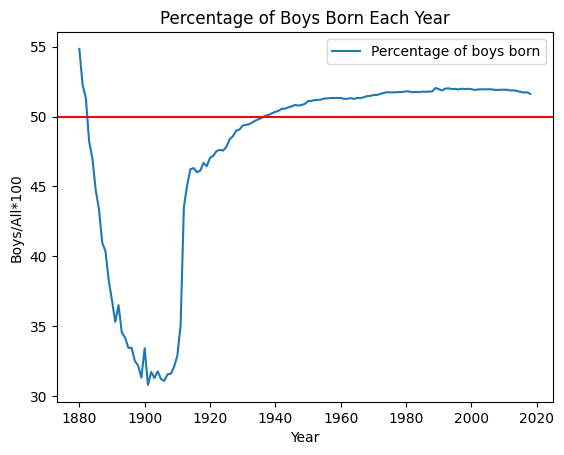

In [36]:
sns.lineplot(data=birth_counts, x="Year", y="Boys Percentage", label="Percentage of boys born")
plt.axhline(50,color='red')
plt.title("Percentage of Boys Born Each Year")
plt.xlabel("Year")
plt.ylabel("Boys/All*100")

plt.show()

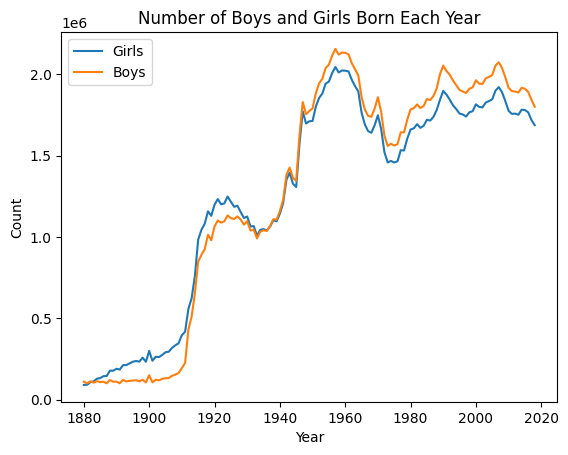

In [13]:
sns.lineplot(data=birth_counts, x="Year", y="Girls Born", label="Girls")
sns.lineplot(data=birth_counts, x="Year", y="Boys Born", label="Boys")

# Set the plot title and labels
plt.title("Number of Boys and Girls Born Each Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Display the plot
plt.show()

In [44]:
int(birth_counts[birth_counts['Year'] == 1980]['Boys Born'])

1784497

In [ ]:
chris_df = pd.DataFrame()

for year in all_data['Year'].unique():

    subdata = all_data[(all_data['Year'] == year)]
    count = subdata[subdata['Name'] == 'Christopher']['Count'].sum()
    percentage = count / int(birth_counts[birth_counts['Year'] == year]['Boys Born']) * 100
    row = pd.DataFrame({'Year': [year], 'Christophers': [count], 'Percentage': [percentage]})
    
    chris_df = chris_df.append(row, ignore_index=True)



In [48]:
chris_df

,Year,Christophers,Percentage
0,1880,95,0.085981
1,1881,68,0.067498
2,1882,89,0.078286
3,1883,89,0.085066
4,1884,68,0.059419
...,...,...,...
134,2014,10368,0.540968
135,2015,9830,0.514246
136,2016,9079,0.479968
137,2017,8285,0.449579


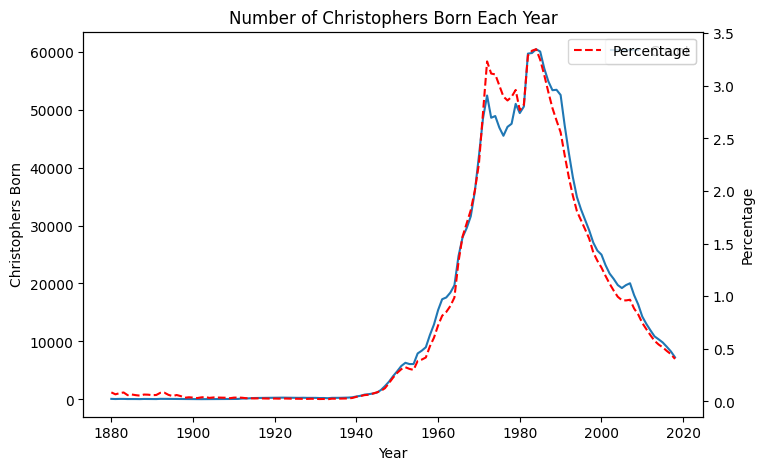

In [54]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
sns.lineplot(data=chris_df, x="Year", y="Christophers", label="Count", ax=ax)
plt.ylabel("Christophers Born")
ax.legend(loc=1)
ax2 = plt.twinx()
sns.lineplot(data=chris_df, x="Year", y="Percentage", label="Percentage", ax=ax2, color='red', linestyle='dashed')

ax2.legend(loc=0)
plt.title("Number of Christophers Born Each Year")
plt.xlabel("Year")
plt.ylabel("Percentage")

plt.show()

In [16]:
expectancy_df = pd.read_csv("/Users/kkubiak/Library/Mobile Documents/com~apple~CloudDocs/CSIT/DSSE/Lab3/Life Expectancy.csv")

In [59]:
expectancy_df['delta'] = expectancy_df['F']-expectancy_df['M']

In [60]:
expectancy_df

,year,M,F,delta
0,2012,76,81,5
1,2011,76,81,5
2,2010,76,81,5
3,2009,75,80,5
4,2008,75,80,5
...,...,...,...,...
78,1934,58,62,4
79,1933,58,62,4
80,1932,58,62,4
81,1931,58,62,4


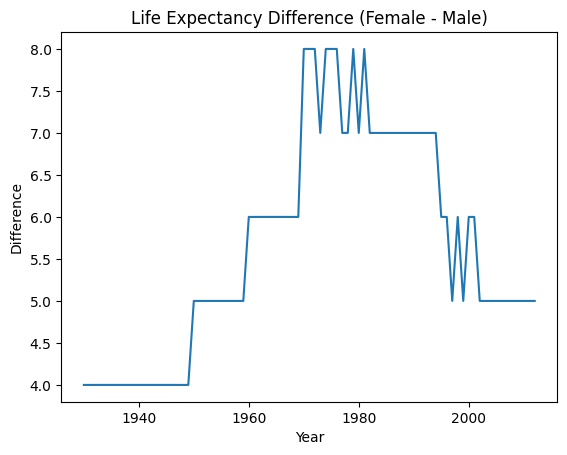

In [63]:
sns.lineplot(data=expectancy_df, x="year", y="delta")
plt.xlabel("Year")
plt.ylabel("Difference")
plt.title("Life Expectancy Difference (Female - Male)")
plt.show()

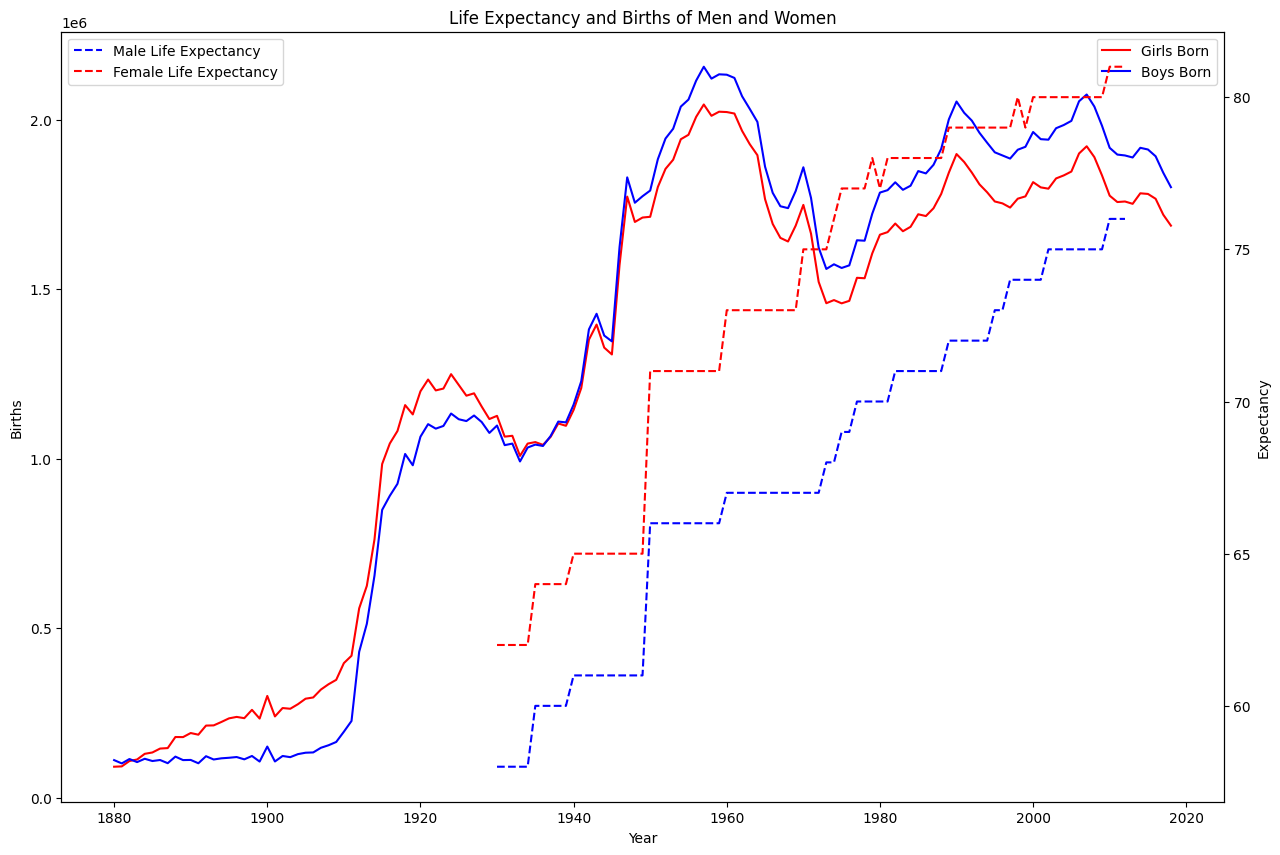

In [58]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
sns.lineplot(data=birth_counts, x="Year", y="Girls Born", label="Girls Born", color='red', ax=ax)
sns.lineplot(data=birth_counts, x="Year", y="Boys Born", label="Boys Born", color='blue', ax=ax)
plt.ylabel("Births")
ax2 = plt.twinx()
sns.color_palette("deep")
sns.lineplot(data=expectancy_df, x="year", y="M", label='Male Life Expectancy', ax=ax2, color='blue', linestyle='dashed')
sns.lineplot(data=expectancy_df, x="year", y="F", label='Female Life Expectancy', ax=ax2, color='red', linestyle='dashed')
ax.legend(loc=1)
ax2.legend(loc=0)
plt.title("Life Expectancy and Births of Men and Women")
plt.xlabel("Year")
plt.ylabel("Expectancy")
plt.legend()

plt.show()

In [20]:
expectancy_df['M'].mean()

67.80722891566265

In [21]:
expectancy_df['F'].mean()

73.44578313253012